In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/Users/jingxiuhu/desktop/capstone/data/train.csv")
test = pd.read_csv("/Users/jingxiuhu/desktop/capstone/data/test.csv")

Id - the id of the email<br />
date - date and time at which mail was received<br />
org - the organisation of the sender<br />
tld - top-level domain of the sender's organisation<br />
ccs - number of people cc'd in the email<br />
bcced - is the receiver bcc'd in the email<br />
mail_type - the type of the mail body<br />
images - number of images in the mail body<br />
urls - number of urls in the mail body<br />
salutations - is salutation used in the email?<br />
designation - is designation of the sender mentioned in the email?<br />
chars_in_subject - number of characters in the email's subject<br />
chars_in_body - number of characters in the email's body<br />
label - the label of the email(1 -> Promotional, 0 -> personal)<br />

In [3]:
train.head()

,Id,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,0,"Sat, 2 Jul 2016 11:02:58 +0530",iiitd,ac.in,4,0,multipart/alternative,0,0,1,0,23,3020,0
1,1,"Sun, 20 Mar 2016 12:05:42 +0530",iiitd,ac.in,9,0,multipart/alternative,0,0,1,0,44,5026,0
2,2,"Tue, 16 Jan 2018 14:46:11 +0000 (UTC)",github,com,1,0,multipart/alternative,2,26,0,0,51,4792,0
3,3,"Sat, 13 Sep 2014 22:36:23 +0000",twitter,com,0,0,multipart/alternative,10,94,0,0,66,47711,1
4,4,"Tue, 26 Sep 2017 13:50:52 +0000 (UTC)",udacity,com,0,0,multipart/alternative,10,40,1,0,53,64317,1


In [4]:
train.shape

(14064, 14)

In [5]:
test.shape

(6029, 13)

In [6]:
train.dtypes

Id                   int64
date                object
org                 object
tld                 object
ccs                  int64
bcced                int64
mail_type           object
images               int64
urls                 int64
salutations          int64
designation          int64
chars_in_subject     int64
chars_in_body        int64
label                int64
dtype: object

In [7]:
train['label'].value_counts()

1    9204
0    4860
Name: label, dtype: int64

Let's check if we have data imbalance.

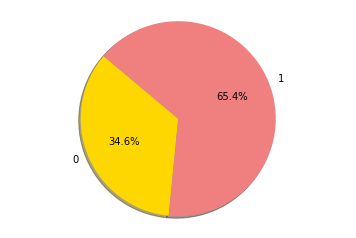

In [8]:
labels = '0', '1'
sizes = [train['label'].value_counts()[0], train['label'].value_counts()[1]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Let's check if there is any null values in our data, we can see we only have null values for variables org and tld, and they both have 114 null values in the train data, and 48 null values in the test data. Let's replace these null values with "Not mentioned" in both train and test

In [9]:
train.isnull().any()

Id                  False
date                False
org                  True
tld                  True
ccs                 False
bcced               False
mail_type           False
images              False
urls                False
salutations         False
designation         False
chars_in_subject    False
chars_in_body       False
label               False
dtype: bool

In [10]:
train.isnull().sum()

Id                    0
date                  0
org                 114
tld                 114
ccs                   0
bcced                 0
mail_type             0
images                0
urls                  0
salutations           0
designation           0
chars_in_subject      0
chars_in_body         0
label                 0
dtype: int64

In [11]:
test.isnull().sum()

Id                   0
date                 0
org                 48
tld                 48
ccs                  0
bcced                0
mail_type            0
images               0
urls                 0
salutations          0
designation          0
chars_in_subject     0
chars_in_body        0
dtype: int64

In [12]:
train = train.fillna('Not_mentioned')
test = test.fillna('Not_mentioned')

In [13]:
train.isnull().any()

Id                  False
date                False
org                 False
tld                 False
ccs                 False
bcced               False
mail_type           False
images              False
urls                False
salutations         False
designation         False
chars_in_subject    False
chars_in_body       False
label               False
dtype: bool

In [14]:
test.isnull().any()

Id                  False
date                False
org                 False
tld                 False
ccs                 False
bcced               False
mail_type           False
images              False
urls                False
salutations         False
designation         False
chars_in_subject    False
chars_in_body       False
dtype: bool

We have too many categoricals for variable org and tld. This would increase the dimension of our model, we might end up with not having enough data to accurately train the model.

In [15]:
print(train.org.unique())
print(len(train.org.unique()))

['iiitd' 'github' 'twitter' 'udacity' 'topcoder' 'quora' 'pvrcinemas'
 'googlegroups' 'indiatimes' 'linkedin' 'centralesupelec' 'amazon' 'plus'
 'crm' 'e' 'reply' 'angel' 'emailer' 'youtube' 'mails' 'usebackpack'
 'hotmail' 'medium' 'symless' 'flipkartletters' 'getpostman' 'discuss'
 'oracle-mail' 'academia-mail' 'statebankrewardz' 'edx' 'duolingo'
 'hackerearth' 'unisys' 'facebookmail' 'brilliant' 'htc' 'mailer' 'mail'
 'redwolf' 'Not_mentioned' 'mentor' 'researchgate' 'rs-components'
 'nvidia' 'mail1' 'nedm' 'newsletter' 'geeksforgeeks' 'sampark'
 'notifications' 'ruprr' 'airtable-2' 'news' 'marketing' 'codeschool'
 'shop' 'ZOONIVERSE' 'send' 'explore' 'xprize' 'email' 'ndtvecommerce'
 'web-spicejet' 'usief' 'innerchef' 'magoosh' 'media' 'bookmyshow'
 'springboard' 'bigbasket' 'kaggle' 'in' 'signalprocessingsociety'
 'researchgatemail' 'magento' 'codecademy' 'iheartdogs-email' 'updates'
 't' 'lss' 'makemytripmails' 'phonepe' 'thomascook' 'neo4j' 'inoxmovies'
 'primevideo' 'flat' 'dat

In [16]:
print(train.tld.unique())
print(len(train.tld.unique()))

['ac.in' 'com' 'fr' 'in' 'google.com' 'sdconnect.in' 'linkedin.com'
 'ebay.in' 'co' 'cardekho.com' 'travel-makemytrip.com' 'pytorch.org' 'org'
 'netflix.com' 'goodreads.com' 'Not_mentioned' 'net' 'co.in' 'prezi.com'
 'asus.com' 'speakingtree.in' 'gov.in' 'pinterest.com' 'info'
 'intercom-mail.com' 'foodpanda.in' 'goindigo.in' 'ORG' 'grammarly.com'
 'nvidia.com' 'org.in' 'jabong.com' 'instagram.com' 'ieee.org' 'email'
 'ibm.com' 'vincerowatches.com' 'paypal.com' 'bookmyshow.com'
 'miscota.com' 'mail.coursera.org' 'supelec.fr' 'skype.com' 'io' 'ai'
 'classmates.com' 'cardekhomailer.com' 'wfp.org' 'bitbucket.org'
 'tripadvisor.com' 'hp.com' 'twitter.com' 'evernote.com' 'quoramail.com'
 'lescrous.fr' 'surveymonkey.com' 'efinmail.com' 'iitm.ac.in' 'is'
 'booking.com' 'vnet.ibm.com' 'reliancegeneral.co.in' 'asana.com'
 'xoom.com' 'gopro.com' 'travel2-makemytrip.com' 'chtah.com' 'itunes.com'
 'digitalglobe.com' 'microsoft.com' 'udacity.com' 'edu' 'godaddy.com'
 'orkut.com' 'payback.in' 'codep

In [17]:
print(train.mail_type.unique())
print(len(train.mail_type.unique()))

['multipart/alternative' 'multipart/mixed' 'text/html' 'text/plain'
 'multipart/related' 'Text/Html' 'Multipart/Mixed']
7


For the date variable, we only want to keep what time the email is received, the day of week when the email is reveived, and which month the email is recevied. Because I think theses features might play an important role when determine if the email recevied is spam or not.

In [18]:
train.date = pd.to_datetime(train.date, utc=True)
test.date = pd.to_datetime(test.date, utc=True)

In [19]:
def engineered_time_feature(df):
    df['month'] = df.date.dt.month
    df['day_of_week'] = df.date.dt.dayofweek
    df['hour'] = df.date.dt.hour
    return df

In [20]:
train = engineered_time_feature(train)
train.head()

,Id,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,month,day_of_week,hour
0,0,2016-07-02 05:32:58+00:00,iiitd,ac.in,4,0,multipart/alternative,0,0,1,0,23,3020,0,7,5,5
1,1,2016-03-20 06:35:42+00:00,iiitd,ac.in,9,0,multipart/alternative,0,0,1,0,44,5026,0,3,6,6
2,2,2018-01-16 14:46:11+00:00,github,com,1,0,multipart/alternative,2,26,0,0,51,4792,0,1,1,14
3,3,2014-09-13 22:36:23+00:00,twitter,com,0,0,multipart/alternative,10,94,0,0,66,47711,1,9,5,22
4,4,2017-09-26 13:50:52+00:00,udacity,com,0,0,multipart/alternative,10,40,1,0,53,64317,1,9,1,13


In [21]:
test = engineered_time_feature(test)
test.head()

,Id,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,month,day_of_week,hour
0,0,2019-02-28 17:54:25+00:00,centralesupelec,fr,0,0,multipart/alternative,0,3,1,0,139,10544,2,3,17
1,1,2017-11-28 04:22:14+00:00,oneplusstore,in,0,0,multipart/alternative,9,42,0,0,56,44178,11,1,4
2,2,2017-07-11 11:50:54+00:00,entertainment,bookmyshow.com,0,0,text/html,17,41,0,0,37,24599,7,1,11
3,3,2016-04-12 07:18:18+00:00,rs-components,co.in,0,0,multipart/alternative,15,45,0,0,38,10774,4,1,7
4,4,2017-08-10 12:31:30+00:00,youtube,com,0,0,multipart/alternative,30,139,1,0,101,81760,8,3,12


We can see the emails recevied at 9 and 8 o'clock have a better chance of being promotional email.

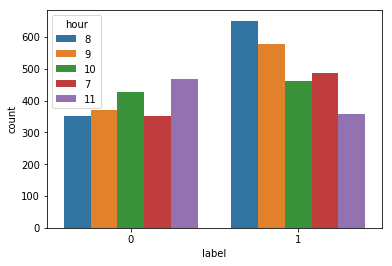

In [22]:
sns.countplot(x = 'label', hue = 'hour', data = train,
              hue_order = train.hour.value_counts().iloc[:5].index)

It looks like we recevie more spam email during the summer.

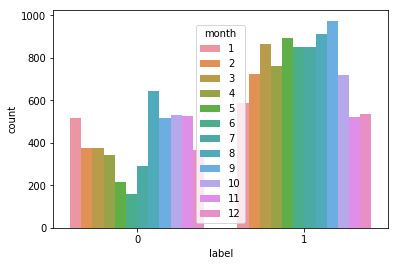

In [23]:
sns.countplot(x = 'label', hue = 'month', data = train)

Day of week doesn't seem to play an important role when determine a email is promotional or not.

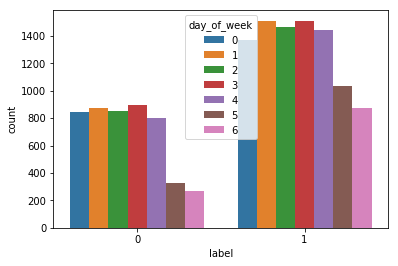

In [24]:
sns.countplot(x = 'label', hue = 'day_of_week', data = train)

From this plot we can see promotional email almost all promotional emails have 0 people cc'd in the email.

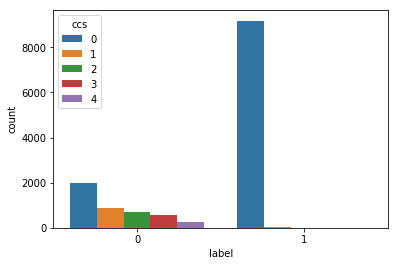

In [25]:
sns.countplot(x = 'label', hue = 'ccs', data = train,
              hue_order = train.ccs.value_counts().iloc[:5].index)

bcced and mail_type might not be crucial in determine whether an email is promotional or not.

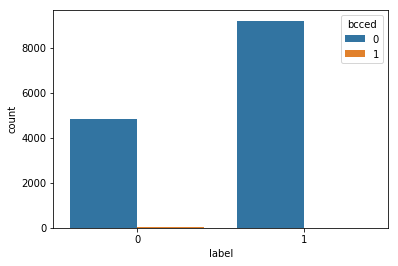

In [26]:
sns.countplot(x = 'label', hue = 'bcced', data = train)

It seems mail type has no significant impact. However, text/html does to seem have a higher proportion in the promotional email. 

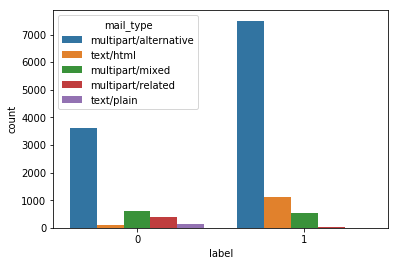

In [27]:
sns.countplot(x = 'label', hue = 'mail_type', data = train,
              hue_order = train.mail_type.value_counts().iloc[:5].index)

The top level domain appeared most time for personal email is ac.in.  And for promotional email is com.

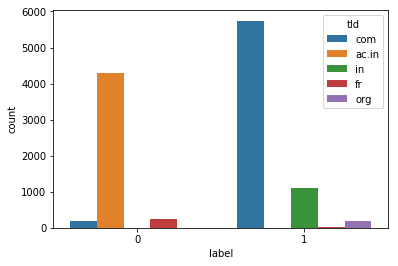

In [28]:
sns.countplot(x = 'label', hue = 'tld', data = train,
              hue_order = train.tld.value_counts().iloc[:5].index)

We can see all personal email’s sender’s organization is iiitd.

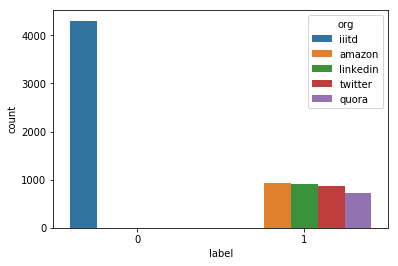

In [29]:
sns.countplot(x = 'label', hue = 'org', data = train,
              hue_order = train.org.value_counts().iloc[:5].index)

Here is almost the final dataframe we will feed our model, just one more step.

In [30]:
train_df = train[["label","org","tld","mail_type","ccs","bcced","images","urls","salutations","designation","chars_in_subject","chars_in_body","month","day_of_week","hour"]]
train_df.head()

,label,org,tld,mail_type,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,month,day_of_week,hour
0,0,iiitd,ac.in,multipart/alternative,4,0,0,0,1,0,23,3020,7,5,5
1,0,iiitd,ac.in,multipart/alternative,9,0,0,0,1,0,44,5026,3,6,6
2,0,github,com,multipart/alternative,1,0,2,26,0,0,51,4792,1,1,14
3,1,twitter,com,multipart/alternative,0,0,10,94,0,0,66,47711,9,5,22
4,1,udacity,com,multipart/alternative,0,0,10,40,1,0,53,64317,9,1,13


In [31]:
test_df = test[["org","tld","mail_type","ccs","bcced","images","urls","salutations","designation","chars_in_subject","chars_in_body","month","day_of_week","hour"]]
test_df.head()

,org,tld,mail_type,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,month,day_of_week,hour
0,centralesupelec,fr,multipart/alternative,0,0,0,3,1,0,139,10544,2,3,17
1,oneplusstore,in,multipart/alternative,0,0,9,42,0,0,56,44178,11,1,4
2,entertainment,bookmyshow.com,text/html,0,0,17,41,0,0,37,24599,7,1,11
3,rs-components,co.in,multipart/alternative,0,0,15,45,0,0,38,10774,4,1,7
4,youtube,com,multipart/alternative,0,0,30,139,1,0,101,81760,8,3,12


We need to label encode org tld and mail_type in order to feed them to the model

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['org'])
encode_org = le.transform(train['org'])
le.fit(train['tld'])
encode_tld = le.transform(train['tld'])
le.fit(train['mail_type'])
encode_mail_type = le.transform(train['mail_type'])

In [33]:
train_df['org'] = encode_org
train_df['tld'] = encode_tld
train_df['mail_type'] = encode_mail_type
train_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,label,org,tld,mail_type,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,month,day_of_week,hour
0,0,115,3,2,4,0,0,0,1,0,23,3020,7,5,5
1,0,115,3,2,9,0,0,0,1,0,44,5026,3,6,6
2,0,100,22,2,1,0,2,26,0,0,51,4792,1,1,14
3,1,240,22,2,0,0,10,94,0,0,66,47711,9,5,22
4,1,242,22,2,0,0,10,40,1,0,53,64317,9,1,13


In [34]:
le = preprocessing.LabelEncoder()
le.fit(test['org'])
encode_org = le.transform(test['org'])
le.fit(test['tld'])
encode_tld = le.transform(test['tld'])
le.fit(test['mail_type'])
encode_mail_type = le.transform(test['mail_type'])

In [35]:
test_df['org'] = encode_org
test_df['tld'] = encode_tld
test_df['mail_type'] = encode_mail_type
test_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,org,tld,mail_type,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,month,day_of_week,hour
0,27,29,2,0,0,0,3,1,0,139,10544,2,3,17
1,145,47,2,0,0,9,42,0,0,56,44178,11,1,4
2,63,8,5,0,0,17,41,0,0,37,24599,7,1,11
3,170,15,2,0,0,15,45,0,0,38,10774,4,1,7
4,210,17,2,0,0,30,139,1,0,101,81760,8,3,12


In [36]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [37]:
X = train_df[train_df.columns[1:]]
y = train_df[train_df.columns[0]]

Split data to train and val to test which model might be better

In [38]:
seed = 1
test_size = 0.33
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=seed)

Logestic regression has f score of 0.9692.

In [39]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_val)
predictions = [round(value) for value in y_pred]
f1Score = f1_score(y_val, predictions)
print(f1Score)

0.9692332736447989


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


XGB classifier(uses gardient boosting) has a better performance, with f socre of 0.9990.

In [40]:
clf = xgb.XGBClassifier(n_estimators = 200)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

Here is the feature importance of our model.

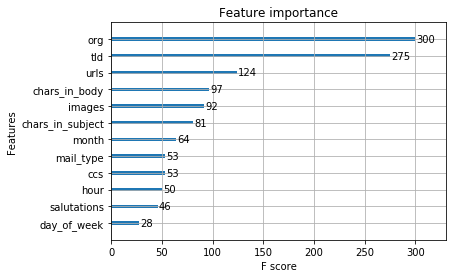

In [41]:
xgb.plot_importance(clf)

In [42]:
y_pred = clf.predict(X_val)
predictions = [round(value) for value in y_pred]

In [43]:
accuracy = accuracy_score(y_val, predictions)
print(f'accuracy is {accuracy * 100}')

accuracy is 99.87074536837571


In [44]:
f1Score = f1_score(y_val, predictions)
print(f'F1 score is {f1Score * 100}')

F1 score is 99.90108803165182


In [45]:
confusion_matrix(y_val, predictions)

array([[1606,    5],
       [   1, 3030]])

Tuning the max_depth parameter.

In [46]:
f1_depth = []
index_depth = [1,2,3,4,5,6,7,8,9,10]
for i in range(1, 11, 1):
    clf = xgb.XGBClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    predictions = [round(value) for value in y_pred]
    f1Score = f1_score(y_val, predictions)
    print(f'F1 score is {f1Score * 100}')
    f1_depth.append(f1Score)

F1 score is 99.40769990128332
F1 score is 99.73640856672158
F1 score is 99.88462172408109
F1 score is 99.88462172408109
F1 score is 99.88462172408109
F1 score is 99.86811737553577
F1 score is 99.86811737553577
F1 score is 99.86811737553577
F1 score is 99.86811737553577
F1 score is 99.86811737553577


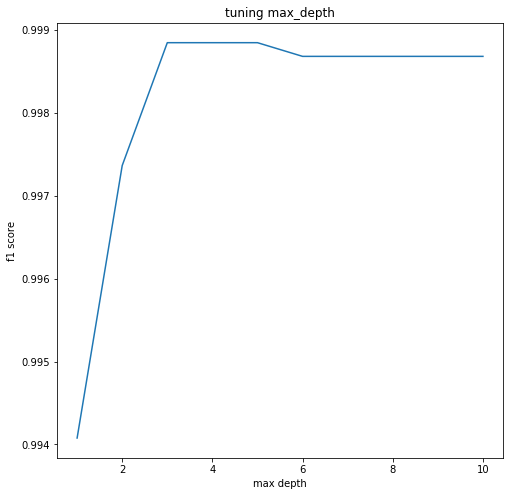

In [47]:
plt.figure(figsize=(8,8))
plt.plot(index_depth, f1_depth)
plt.title('tuning max_depth')
plt.xlabel('max depth')
plt.ylabel('f1 score')
plt.show()

Tuning the n_estimaters parameter.

In [48]:
f1_estimators = []
index_estimator = [100,150,200,250,300,350,400,450,500]
for i in range(100, 501, 50):
    clf = xgb.XGBClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    predictions = [round(value) for value in y_pred]
    f1Score = f1_score(y_val, predictions)
    print(f'F1 score is {f1Score * 100}')
    f1_estimators.append(f1Score)

F1 score is 99.88462172408109
F1 score is 99.91755976916737
F1 score is 99.90108803165182
F1 score is 99.90108803165182
F1 score is 99.91755976916737
F1 score is 99.91755976916737
F1 score is 99.91755976916737
F1 score is 99.91755976916737
F1 score is 99.91755976916737


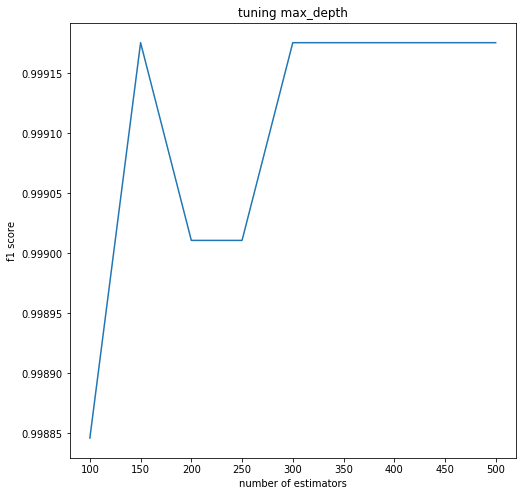

In [49]:
plt.figure(figsize=(8,8))
plt.plot(index_estimator, f1_estimators)
plt.title('tuning max_depth')
plt.xlabel('number of estimators')
plt.ylabel('f1 score')
plt.show()

The best score I got from kaggle is with max_depth = 4 and n_estimators = 200.

In [50]:
clf = xgb.XGBClassifier(max_depth=4,n_estimators=220)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=220, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [51]:
test_pred = clf.predict(test_df)
test_predictions = [round(value) for value in test_pred]

In [52]:
test['label'] = test_predictions

In [53]:
test[['Id', 'label']].to_csv('test_predcited.csv', index= False)